<img src="logo_Iscs.png">

# Multiclass Classification Project 
by Ruslan Magana Vsevolodovna

Genova November 2020

<img src="accomodation.jpg">

In this project we are going to classify the accomodations given by some features collected in one dataset.
The target is the classification of the following types of accomodations:

1. Hotel 1-3 stelle

2. Hotel 4 stelle e oltre

3. Bed & Breakfast

4. Campeggi

5. Case/appartamenti



### 1. Libraries

In [4]:
import pandas as pd

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

### 2. Data Wrangling

In [5]:
df=pd.read_csv ('classification_dataset.csv',sep = '\t', )

Replace NaN Values with Zeros in Pandas DataFrame
For an entire DataFrame using Pandas:

In [6]:
df=df.fillna(0)

In [8]:
df.head()

,ID,PROVINCIA,COMUNE,LOCALITA,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,...,ZONA_PERIFERICA,ZONA_STAZIONE_FS,ATTREZZATURE_VARIE,CARTE_ACCETTATE,LINGUE_PARLATE,SPORT,CONGRESSI,LATITUDINE,LONGITUDINE,OUTPUT
0,0,BS,PERTICA BASSA,0,2,0,4,1,0,0.0,...,0.0,0.0,0,0,0,0,0,10.373501,45.751381,B&B
1,1,BS,DESENZANO DEL GARDA,0,4,0,8,4,0,0.0,...,0.0,0.0,0,0,0,0,0,10.538947,45.469485,B&B
2,2,BG,BERGAMO,0,1,0,2,1,0,0.0,...,0.0,0.0,Accettazione animali domestici,0,0,0,0,9.665355,45.704158,Case_Appartamenti
3,3,MN,MANTOVA,BOCCABUSA,93,2,194,96,0,0.0,...,0.0,0.0,"Ascensore,Ristorante,Bar,Accettazione animali ...","American express,Visa,Master Card,Diners,Maest...","Inglese,Francese,Spagnolo,Tedesco,Rumeno,Serbo...",0,"Numero sale congressi 3,Congressi capacita' Mi...",10.828175,45.165506,4_a_5_Stelle
4,4,MI,MILANO,0,2,0,4,1,0,0.0,...,0.0,0.0,0,0,0,0,0,9.151637,45.457177,Case_Appartamenti


There are some features that do not gives important information:
Such as: ID, LOCALITA, LATITUDINE	 LONGITUDINE

In [9]:
del df['ID']
del df['LOCALITA']
del df['LATITUDINE']
del df['LONGITUDINE']
del df['PROVINCIA']
del df['COMUNE']

In [11]:
dfa=df

One-hot Encoding is a type of vector representation in which all of the elements in a vector are 0, except for one, which has 1 as its value, where 1 represents a boolean specifying a category of the element.

In [12]:
new_df = pd.concat([dfa.drop('ATTREZZATURE_VARIE', 1), dfa['ATTREZZATURE_VARIE'].str.get_dummies(sep=",")], 1)
new_df2 = pd.concat([new_df.drop('CARTE_ACCETTATE', 1), new_df['CARTE_ACCETTATE'].str.get_dummies(sep=",")], 1)
new_df3 = pd.concat([new_df2.drop('LINGUE_PARLATE', 1), new_df2['LINGUE_PARLATE'].str.get_dummies(sep=",")], 1)
new_df4 = pd.concat([new_df3.drop('SPORT', 1), new_df3['SPORT'].str.get_dummies(sep=",")], 1)
new_df5 = pd.concat([new_df4.drop('CONGRESSI', 1), new_df4['CONGRESSI'].str.get_dummies(sep=",")], 1)


In [13]:
new_df5.describe()

,CAMERE,SUITE,LETTI,BAGNI,PRIMA_COLAZIONE,IN_ABITATO,SUL_LAGO,VICINO_ELIPORTO,VICINO_AEREOPORTO,ZONA_CENTRALE,...,Numero sale congressi 17,Numero sale congressi 2,Numero sale congressi 21,Numero sale congressi 3,Numero sale congressi 4,Numero sale congressi 5,Numero sale congressi 6,Numero sale congressi 7,Numero sale congressi 8,Numero sale congressi 9
count,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,...,6775.000000,6775.000000,6775.000000,6775.000000,6775.00000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000
mean,16.261550,0.455646,35.002509,13.620517,0.101402,0.083542,0.052546,0.000590,0.027897,0.099041,...,0.000295,0.008413,0.000148,0.004428,0.00428,0.001624,0.001328,0.001181,0.000886,0.000738
std,35.859435,3.592147,93.538492,29.174499,0.301883,0.276721,0.223142,0.024293,0.164689,0.298739,...,0.017180,0.091344,0.012149,0.066401,0.06529,0.040264,0.036426,0.034345,0.029748,0.027158
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.000000,0.000000,25.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,528.000000,110.000000,1816.000000,448.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Encode The Output Variable The output variable contains different string values.

When modeling multi-class classification problems using neural networks, it is good practice to reshape the output attribute from a vector that contains values for each class value to be a matrix with a boolean for each class value and whether or not a given instance has that class value or not.

In [14]:
new_df6 = pd.concat([new_df5.drop('OUTPUT', 1), new_df5['OUTPUT'].str.get_dummies(sep=",")], 1)

In [15]:
new_df6.dtypes

CAMERE               int64
SUITE                int64
LETTI                int64
BAGNI                int64
PRIMA_COLAZIONE      int64
                     ...  
1_a_3_Stelle         int64
4_a_5_Stelle         int64
B&B                  int64
Campeggio            int64
Case_Appartamenti    int64
Length: 313, dtype: object

We have now all our fetures numeric we can use it.

We have several fetures. we can **REDUCE** the dimensions by using Principal Component Analysis ( **PCA** )but for lack of time, we just show the standard procedure to classify with the current status of the dataset.

## 3. MODEL CREATION

In [17]:
dataset=new_df6.to_numpy()

In [18]:
X = dataset[:,0:308].astype(float)

In [19]:
len(X)

6775

In [20]:
Y = dataset[:,308:]

In [21]:
len(Y)

6775

The Keras library provides wrapper classes to allow you to use neural network models developed with Keras in scikit-learn.

There is a KerasClassifier class in Keras that can be used as an Estimator in scikit-learn, the base type of model in the library. The KerasClassifier takes the name of a function as an argument. This function must return the constructed neural network model, ready for training.

Below is a function that will create a baseline neural network for the Accomodation classification problem. 
It creates a simple fully connected network with one hidden layer that contains 616 neurons.

The hidden layer uses a rectifier activation function which is a good practice. Because we used a one-hot encoding for our  dataset, the output layer must create 5 output values, one for each class. The output value with the largest value will be taken as the class predicted by the model.

The network topology of this simple one-layer neural network can be summarized as:

308 inputs -> [616 hidden nodes] -> 5 outputs

Note that we use a “softmax” activation function in the output layer. This is to ensure the output values are in the range of 0 and 1 and may be used as predicted probabilities.

Finally, the network uses the efficient Adam gradient descent optimization algorithm with a logarithmic loss function, which is called “categorical_crossentropy” in Keras.

In [23]:
seed = 7

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=seed)

In [25]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed)

The hyperparameteres were computed in the optional section by using GridCSV

Best: 0.880295 using {'batch_size': 80, 'epochs': 200}

In [26]:
model = Sequential()
model.add(Dense(616,activation='relu',input_shape = (308,)))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer = 'adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [27]:
history = model.fit(x_train, 
                    y_train,
                    epochs = 200,
                    batch_size = 80,
                    verbose=0,
                    validation_data=(x_val,y_val))

## 4. RESULTS

We define some programs to visualize the results
Plot History : plot loss and accuracy from the history 
Full Report : print a full report and plot a confusion matrix 


In [29]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

###  Results 

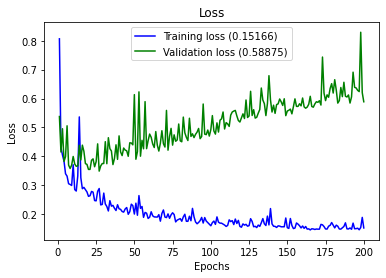

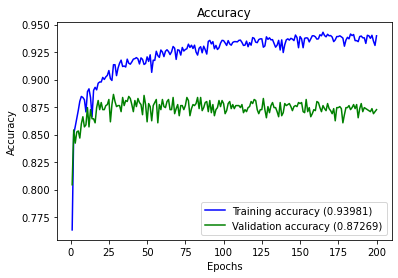

In [31]:
plot_history(history)

In [48]:
labels=list(new_df6.columns)[308:] 

In [49]:
labels

['1_a_3_Stelle', '4_a_5_Stelle', 'B&B', 'Campeggio', 'Case_Appartamenti']

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy : 0.8726937269372693

Classification Report
              precision    recall  f1-score   support

           0    0.86364   0.86008   0.86186       243
           1    0.61111   0.59459   0.60274        74
           2    0.93651   0.81944   0.87407       288
           3    1.00000   0.82353   0.90323        17
           4    0.87897   0.95887   0.91718       462

    accuracy                        0.87269      1084
   macro avg    0.85804   0.81131   0.83182      1084
weighted avg    0.87443   0.87269   0.87164      1084

[[209  28   0   0   6]
 [ 28  44   0   0   2]
 [  0   0 236   0  52]
 [  1   0   1  14   1]
 [  4   0  15   0 443]]


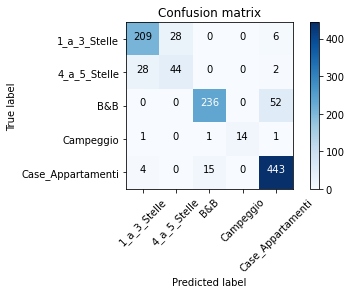

In [50]:
full_multiclass_report(model,
                       x_val,
                       y_val,
                       labels
                      )

## Additional comments

The results can be improved by using PCA and a Grid Search.
GridSearchCV resolve the issue relative to the multiclass models when using custom scoring, find the best hyperparameters.

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
import numpy
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [53]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(2*308, input_dim=308, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [54]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [5, 10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)

In [55]:
from sklearn.utils import shuffle

In [56]:
X, Y = shuffle(X, Y)

In [ ]:
grid_result = grid.fit(X, Y)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.880295 using {'batch_size': 80, 'epochs': 200}

which are the hyperparemetes used before.

Greetings